In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# from pandasql import sqldf
import pandas as pd
from sklearn import datasets

from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
df = pd.read_csv("gdrive/My Drive/dataset/Amazon_fine_food_review.csv")

Mounted at /content/gdrive


In [ ]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [3]:
import pandas as pd

filtered_data = df[df['Score'] != 3].head(5000)



In [ ]:
filtered_data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
5422,5423,B00622CYVS,A17ASMX6QMO6XY,E. Harvill,0,1,2,1277424000,Not so tasty...,"My baby didn't seem into these dinners, so I t..."
5423,5424,B00622CYVS,A32DHN8U74GCAR,"Granola Girl ""michele j.""",0,1,4,1240790400,Food Delivery,This is great! Organic baby food options - de...
5424,5425,B00622CYVS,A2YHXAZLCLDT8D,"Mark Smith ""Food lover""",0,1,5,1236988800,Dinner time is Earths Best TIme !!,My little guy loves to try new foods..so this ...
5425,5426,B00622CYVS,A2NYT3UXUTBY23,C&GHoll,1,3,2,1249603200,Wrong item shipped,We ordered the Earth's best 2nd dinner variety...


In [4]:
# Give reviews with Score>3 a positive rating(1), and reviews with a score<3 a negative rating(0).
def partition(x):
    if x < 3:
        return 0
    return 1

#changing reviews with score less than 3 to be positive and vice-versa
actualScore = filtered_data['Score']
positiveNegative = actualScore.map(partition)
filtered_data['Score'] = positiveNegative
print("Number of data points in our data", filtered_data.shape)
filtered_data.head(3)

Number of data points in our data (5000, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [5]:
import pandas as pd

# Assuming you have the 'filtered_df' DataFrame from previous filtering
# Create a DataFrame that includes rows where 'Score' is not equal to 3 and has more than one occurrence per 'UserId'
result = filtered_data.groupby('UserId').filter(lambda group: len(group) > 1)

# Group the filtered DataFrame and count occurrences
result = result.groupby(['UserId', 'ProductId', 'ProfileName', 'Time', 'Score', 'Text']).size().reset_index(name='Count')

# Display the result
result


,UserId,ProductId,ProfileName,Time,Score,Text,Count
0,A132ETQPMHQ585,B00139TT72,"Donna's Reviews ""I Love Shopping on Amazon!""",1324166400,0,Good but not my favorite.........Newman's Own ...,1
1,A132ETQPMHQ585,B001RVFDOO,"Donna's Reviews ""I Love Shopping on Amazon!""",1309737600,0,OK...but would never buy them again my husband...,1
2,A13E0ARAXI6KJW,B000F9Z1WI,Ed Uyeshima,1156464000,1,I hate to admit I miss the lard. I was the one...,1
3,A13E0ARAXI6KJW,B000F9Z1WI,Ed Uyeshima,1204502400,1,I hate to admit I miss the lard. I was the one...,1
4,A13T0V3LHOTHDL,B0045IK1CK,"E. Treants ""tree""",1317427200,1,This is a much better Hot Chocolate than some ...,1
...,...,...,...,...,...,...,...
304,AY1EF0GOH80EK,B000G6RYNE,Natasha Stryker,1327708800,1,Someone brought these to a party we had last m...,1
305,AY1EF0GOH80EK,B001EPPCNK,Natasha Stryker,1349395200,1,So I got this and tasted it strait out of the ...,1
306,AZV26LP92E6WU,B000G33MVK,"M. Hammond ""ColemanFlGuy""",1262217600,1,It is great! I like it alot. Great price too. ...,1
307,AZV26LP92E6WU,B0045TDE4Q,"M. Hammond ""ColemanFlGuy""",1347148800,1,i followed the easy instructions and these tur...,1


In [ ]:
print(result.shape)
result.head()

(309, 7)


,UserId,ProductId,ProfileName,Time,Score,Text,Count
0,A132ETQPMHQ585,B00139TT72,"Donna's Reviews ""I Love Shopping on Amazon!""",1324166400,0,Good but not my favorite.........Newman's Own ...,1
1,A132ETQPMHQ585,B001RVFDOO,"Donna's Reviews ""I Love Shopping on Amazon!""",1309737600,0,OK...but would never buy them again my husband...,1
2,A13E0ARAXI6KJW,B000F9Z1WI,Ed Uyeshima,1156464000,1,I hate to admit I miss the lard. I was the one...,1
3,A13E0ARAXI6KJW,B000F9Z1WI,Ed Uyeshima,1204502400,1,I hate to admit I miss the lard. I was the one...,1
4,A13T0V3LHOTHDL,B0045IK1CK,"E. Treants ""tree""",1317427200,1,This is a much better Hot Chocolate than some ...,1


In [6]:
result = result.drop_duplicates(subset=['UserId'])
result

,UserId,ProductId,ProfileName,Time,Score,Text,Count
0,A132ETQPMHQ585,B00139TT72,"Donna's Reviews ""I Love Shopping on Amazon!""",1324166400,0,Good but not my favorite.........Newman's Own ...,1
2,A13E0ARAXI6KJW,B000F9Z1WI,Ed Uyeshima,1156464000,1,I hate to admit I miss the lard. I was the one...,1
4,A13T0V3LHOTHDL,B0045IK1CK,"E. Treants ""tree""",1317427200,1,This is a much better Hot Chocolate than some ...,1
6,A14I86SK59DIX,B000ER1DIM,ginabi,1327190400,1,Bought these for my grandbabies and they love ...,1
8,A15USNEAJUXOSH,B000G6RYNE,L. Schrank,1326067200,1,I enjoy these chips. I got these instead of my...,1
...,...,...,...,...,...,...,...
295,AVCA516CFZ9HF,B004K2IHUO,S. Fowler,1335139200,1,The crust on these tarts are perfect. My husb...,1
297,AXO4PQU0XG3TG,B000CS9ZTC,Dwight,1173657600,0,I wait for this cereal to go on sale before I ...,1
299,AY12DBB0U420B,B000X2CWTM,Gary Peterson,1263340800,1,I've always liked licorice candy and the best ...,1
304,AY1EF0GOH80EK,B000G6RYNE,Natasha Stryker,1327708800,1,Someone brought these to a party we had last m...,1


In [ ]:
result

,UserId,ProductId,ProfileName,Time,Score,Text,Count
0,A132ETQPMHQ585,B00139TT72,"Donna's Reviews ""I Love Shopping on Amazon!""",1324166400,0,Good but not my favorite.........Newman's Own ...,1
2,A13E0ARAXI6KJW,B000F9Z1WI,Ed Uyeshima,1156464000,1,I hate to admit I miss the lard. I was the one...,1
4,A13T0V3LHOTHDL,B0045IK1CK,"E. Treants ""tree""",1317427200,1,This is a much better Hot Chocolate than some ...,1
6,A14I86SK59DIX,B000ER1DIM,ginabi,1327190400,1,Bought these for my grandbabies and they love ...,1
8,A15USNEAJUXOSH,B000G6RYNE,L. Schrank,1326067200,1,I enjoy these chips. I got these instead of my...,1
...,...,...,...,...,...,...,...
295,AVCA516CFZ9HF,B004K2IHUO,S. Fowler,1335139200,1,The crust on these tarts are perfect. My husb...,1
297,AXO4PQU0XG3TG,B000CS9ZTC,Dwight,1173657600,0,I wait for this cereal to go on sale before I ...,1
299,AY12DBB0U420B,B000X2CWTM,Gary Peterson,1263340800,1,I've always liked licorice candy and the best ...,1
304,AY1EF0GOH80EK,B000G6RYNE,Natasha Stryker,1327708800,1,Someone brought these to a party we had last m...,1


In [7]:
#Sorting data according to ProductId in ascending order
sorted_data=filtered_data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [ ]:
sorted_data.shape

(5000, 10)

In [8]:
#Deduplication of entries
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape

(4986, 10)

In [ ]:
#Checking to see how much % of data still remains
(final['Id'].size*1.0)/(filtered_data['Id'].size*1.0)*100

99.72

In [ ]:
final

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
2773,2774,B00002NCJC,A196AJHU9EASJN,Alex Chaffee,0,0,1,1282953600,thirty bucks?,Why is this $[...] when the same product is av...
2774,2775,B00002NCJC,A13RRPGE79XFFH,reader48,0,0,1,1281052800,Flies Begone,We have used the Victor fly bait for 3 seasons...
1243,1244,B00002Z754,A3B8RCEI0FXFI6,B G Chase,10,10,1,962236800,WOW Make your own 'slickers' !,I just received my shipment and could hardly w...
1244,1245,B00002Z754,A29Z5PI9BW2PU3,Robbie,7,7,1,961718400,Great Product,This was a really good idea and the final prod...
3203,3204,B000084DVR,A1UGDJP1ZJWVPF,"T. Moore ""thoughtful reader""",1,1,1,1177977600,Good stuff!,I'm glad my 45lb cocker/standard poodle puppy ...
...,...,...,...,...,...,...,...,...,...,...
764,765,B009HINRX8,A1OEL4UZT3KKI4,"coffee drinker in PA ""coffee drinker in PA""",0,0,1,1344988800,great coffee - terrible price,"This is one of the best choices, in my opinion..."
763,764,B009HINRX8,ADDBLG0CFY9AI,S.A.D.,1,1,1,1326758400,Best of the Tassimo's,We've tried many Tassimo flavors. This is by ...
762,763,B009HINRX8,A3N9477PUE6WMR,patc477,4,4,1,1323302400,Good Tasting cup o' joe,This is a bold blend that has a great taste. T...
767,768,B009HINRX8,A2CAZG1CQ8BQI5,Patricia J. Nohalty,0,0,1,1337212800,Kona for Tassimo,Of all the coffee's available for Tassimo this...


Observation:- It was also seen that in two rows given below the value of HelpfulnessNumerator is greater than HelpfulnessDenominator which is not practically possible hence these two rows too are removed from calcualtions

In [9]:
final = final[final['HelpfulnessNumerator'] <= final['HelpfulnessDenominator']]


In [10]:
#Before starting the next phase of preprocessing lets see the number of entries left
print(final.shape)

#How many positive and negative reviews are present in our dataset?
final['Score'].value_counts()

(4986, 10)


1    4178
0     808
Name: Score, dtype: int64

Preprocessing:
Now that we have finished deduplication our data requires some preprocessing before we go on further with analysis and making the prediction model.

Hence in the Preprocessing phase we do the following in the order below:-

Begin by removing the html tags
Remove any punctuations or limited set of special characters like , or . or # etc.
Check if the word is made up of english letters and is not alpha-numeric
Check to see if the length of the word is greater than 2 (as it was researched that there is no adjective in 2-letters)
Convert the word to lowercase
Remove Stopwords
Finally Snowball Stemming the word (it was obsereved to be better than Porter Stemming)
After which we collect the words used to describe positive and negative reviews

In [ ]:
# printing some random reviews
sent_0 = final['Text'].values[0]
print(sent_0)
print("="*50)

sent_1000 = final['Text'].values[1000]
print(sent_1000)
print("="*50)

sent_1500 = final['Text'].values[1500]
print(sent_1500)
print("="*50)

sent_4900 = final['Text'].values[4900]
print(sent_4900)
print("="*50)

Why is this $[...] when the same product is available for $[...] here?<br />http://www.amazon.com/VICTOR-FLY-MAGNET-BAIT-REFILL/dp/B00004RBDY<br /><br />The Victor M380 and M502 traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby.
I recently tried this flavor/brand and was surprised at how delicious these chips are.  The best thing was that there were a lot of "brown" chips in the bsg (my favorite), so I bought some more through amazon and shared with family and friends.  I am a little disappointed that there are not, so far, very many brown chips in these bags, but the flavor is still very good.  I like them better than the yogurt and green onion flavor because they do not seem to be as salty, and the onion flavor is better.  If you haven't eaten Kettle chips before, I recommend that you try a bag before buying bulk.  They are thicker and crunchier than Lays but just as fresh out of the bag.
Wow.  So far, two two-star reviews.  One obviously had no 

In [11]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [12]:
final['Text'] = final['Text'].apply(decontracted)


In [14]:
# Download the stopwords if you haven't already
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
# Combining all the things
from nltk.corpus import stopwords
# Download the stopwords if you haven't already
nltk.download('stopwords')
# Tokenize the sentence

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

# Assuming 'final' is your DataFrame
final['Preprocessed_Reviews'] = final['Text'].apply(lambda sentance:
    ' '.join([word.lower() for word in re.sub(r'[^A-Za-z]+', ' ', decontracted(BeautifulSoup(re.sub(r"http\S+", "", sentance), 'lxml').get_text())).split() if word.lower() not in stopwords.words('english')]).strip()
)


**tSNE on BOW vectors**

In [21]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Create BOW vectors
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(final['Preprocessed_Reviews'])


In [23]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X.toarray())  # Convert BOW vectors to an array for t-SNE

# Create a new DataFrame for the embedded vectors
df_embedded = pd.DataFrame(X_embedded, columns=['tsne_1', 'tsne_2'])

# Concatenate the embedded DataFrame with the original DataFrame
df_result = pd.concat([final, df_embedded], axis=1)


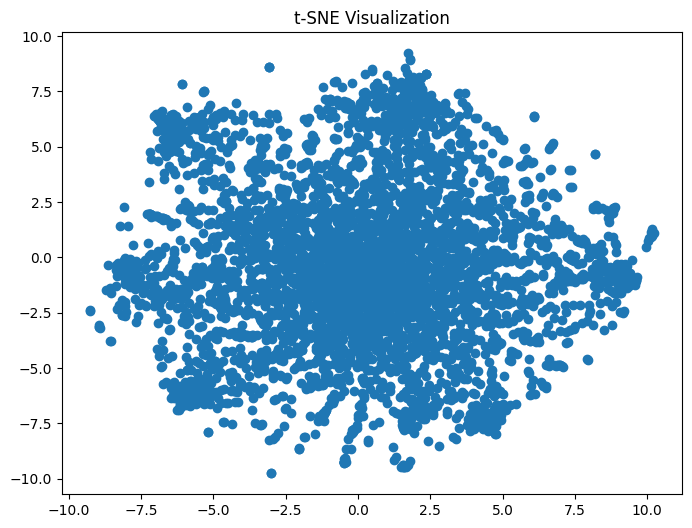

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(df_result['tsne_1'], df_result['tsne_2'])
plt.title("t-SNE Visualization")
plt.show()


**Decision Tree**

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB  # Import Multinomial Naive Bayes
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn import tree


# Split the dataset into a training set and a test set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(final['Preprocessed_Reviews'], final['Score'], test_size=0.2, random_state=42)

# Create a TF-IDF representation with min_df and max_features
tfidf_vectorizer = TfidfVectorizer(min_df=10, max_features=500)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

DT_model = tree.DecisionTreeClassifier()
DT_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = DT_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Generate the AUC score
y_pred_prob = DT_model.predict_proba(X_test_tfidf)[:, 1]  # Probability of the positive class
auc_score = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy}")
print(report)
print(f"AUC Score: {auc_score}")


Accuracy: 0.7915831663326653
              precision    recall  f1-score   support

           0       0.34      0.35      0.35       156
           1       0.88      0.87      0.88       842

    accuracy                           0.79       998
   macro avg       0.61      0.61      0.61       998
weighted avg       0.79      0.79      0.79       998

AUC Score: 0.6127428588830015


**Random Forest**

In [19]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB  # Import Multinomial Naive Bayes
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn import tree


# Split the dataset into a training set and a test set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(final['Preprocessed_Reviews'], final['Score'], test_size=0.2, random_state=42)

# Create a TF-IDF representation with min_df and max_features
tfidf_vectorizer = TfidfVectorizer(min_df=10, max_features=500)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = clf.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Generate the AUC score
y_pred_prob = clf.predict_proba(X_test_tfidf)[:, 1]  # Probability of the positive class
auc_score = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy}")
print(report)
print(f"AUC Score: {auc_score}")


Accuracy: 0.843687374749499
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       156
           1       0.84      1.00      0.92       842

    accuracy                           0.84       998
   macro avg       0.42      0.50      0.46       998
weighted avg       0.71      0.84      0.77       998

AUC Score: 0.7945368171021379


**Logistic Regression**

In [20]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn import tree


# Split the dataset into a training set and a test set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(final['Preprocessed_Reviews'], final['Score'], test_size=0.2, random_state=42)

# Create a TF-IDF representation with min_df and max_features
tfidf_vectorizer = TfidfVectorizer(min_df=10, max_features=500)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = logisticRegr.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Generate the AUC score
y_pred_prob = logisticRegr.predict_proba(X_test_tfidf)[:, 1]  # Probability of the positive class
auc_score = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy}")
print(report)
print(f"AUC Score: {auc_score}")


Accuracy: 0.8777555110220441
              precision    recall  f1-score   support

           0       0.90      0.24      0.38       156
           1       0.88      1.00      0.93       842

    accuracy                           0.88       998
   macro avg       0.89      0.62      0.66       998
weighted avg       0.88      0.88      0.85       998

AUC Score: 0.8910104147633839


**tSNE**